# Лабораторная работа 3

## Сингулярное разложение и его приложения

Напомним, что сингулярным разложением (SVD, Singular value decomposition) матрицы $A$ размера $m\times n$ называется представление

$$A = U\Sigma V^T,$$

где $U$ — ортогональная матрица размера $m\times m$, $V$ — ортогональная матрица размера $n\times n$, $\Sigma = \mathrm{diag}(\sigma_1,\sigma_2,\sigma_3,\ldots)$ — диагональная матрица размера $m\times n$, в которой $\sigma_1\geqslant\sigma_2\geqslant\ldots\geqslant0$.

На самом деле требование, чтобы матрицы $U$ и $V$ были квадратными, избыточно. *Усечённым сингулярным разложением* мы будем называть разложение

$$A = U\Sigma V^T,$$

где $U$ и $V$ — матрицы с ортонормированными столбцами размеров $m\times k$ и $n \times k$ соответственно, $\Sigma$ — диагональная матрица размера $k\times k$, где $k = \min(m,n)$. Далее мы будем работать исключительно с усечённым разложением.

### Сжатие данных с помощью SVD = построение низкорангового приближения

Введём *норму Фробениуса* матрицы как

$$||A||_{frob} = \sqrt{\mathrm{tr}{A^TA}} = \sqrt{\sum\limits_{i,j}a^2_{i,j}}$$

Иными словами, это обычное евклидово расстояние на пространстве, которое получается, если все матрицы вытянуть в длинные векторы.

Зададимся вопросом: как найти матрицу $A_{r}$ ранга $r$, наименее отличающуюся от $A$ по норме Фробениуса (то есть для которой норма разности $||A - A_{r}||_{frob}$ минимальна). Оказывается, это можно сделать с помощью сингулярного разложения:

**Теорема.** Пусть $\Sigma_{r}$ — это матрица, полученная из $\Sigma$ заменой диагональных элементов $\sigma_{i}$ ($i > r$) нулями, тогда $A_{r} = U\Sigma_{r}V^T$.

Это можно переписать и в более экономичном виде. Если

$$A = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1k}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mk}
\end{pmatrix}}_{=U}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \sigma_{2} & \\
 & & \ddots
\end{pmatrix}}
}_{=\Sigma}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1k} & \ldots & v_{nk}
\end{pmatrix}}_{=V^T}$$

то

$$A_{r} = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1r}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mr}
\end{pmatrix}}_{=U_r}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \ddots & \\
 & & \sigma_{r}
\end{pmatrix}}
}_{=\Sigma_r}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1r} & \ldots & v_{nr}
\end{pmatrix}}_{=V^T_r}$$

При этом

$$||A - A_{r}||_{frob} = \sqrt{\sum\limits_{i\geqslant r+1} \sigma_{i}^2}$$

Если сингулярные значения матрицы падают достаточно быстро (а в реальных задачах часто бывает именно так), то норма разности будет малой при сравнительно небольшом значении $r$.

На хранение исходной матрицы нам требовалось $m\times n$ памяти. Теперь же, если мы будем хранить отдельно $U_r$, $V_r$ и диагональные элементы $\Sigma_r$, затраты памяти составят $mr + nr + r = r(m + n + 1)$.

**Разложение на компоненты ранга 1**

Обозначим через $u_1,\ldots, u_k$ столбцы матрицы $U$, а через $v_1, \ldots, v_k$ столбцы матрицы $V$. Тогда имеет место равенство

$$A = u_1\sigma_{1}v_1^T + u_2\sigma_{2}v_2^T + u_3\sigma_{3}v_3^T + \ldots$$

Матрицу $u_k\sigma_{k}v_k^T = \sigma_{k}u_kv_k^T$ мы будем называть $k$-й компонентой ранга 1 матрицы $A$. Отметим, что слагаемые в этой сумме ортогональны относительно скалярного произведения $(X, Y) = \mathrm{tr}(X^TY)$ (порождающего норму Фробениуса).

Как нетрудно заметить,

$$A_{r} = \sigma_{1}u_1v_1^T + \sigma_{2}u_2v_2^T + \ldots + \sigma_{r}u_rv_r^T$$

**Технические детали (SVD в Питоне)**

Есть несколько способов сделать в Питоне сингулярное разложение; мы пока предлагаем Вам использовать

`import scipy.linalg as sla`

`U, S, Vt = sla.svd(X, full_matrices=False)`

Для ознакомления с особенностями этой функции рекомендуем обратиться к [документации](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html) (в частности, обратите внимание на то, какие именно объекты она возвращает).

### Правила оформления графиков

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные.

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

Ещё одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё.

Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- для точек из разных выборок, необходимо использовать разные цвета;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- размер графика должен быть таким, чтобы по нему несложно было сделать необходимые выводы о данных;
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).

Помните, что проверяющий имеет право снизить оценку за неопрятные графики.

### Оценивание

Обратите внимание, что в каждом разделе есть задания на написания кода и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если Вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то в подавляющем большинстве случаев баллы за такое выставлены не будут.

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-linregr-Username.ipynb, где Username — Ваша фамилия.

### Задание 1. Сжатие данных с помощью SVD

Загрузите выложенную на странице курса фотографию.

In [8]:
import numpy as np
from skimage.io import imread

img = imread(r'chain_small.jpg')
img = img.mean(axis=2) # это матрица из интенсивностей серого цвета; её уже можно подвергать SVD

FileNotFoundError: No such file: 'c:\Users\artemis\Downloads\Telegram Desktop\chain_small.jpg'

In [ ]:
img.shape

(488, 653)

Нарисуйте картинку:

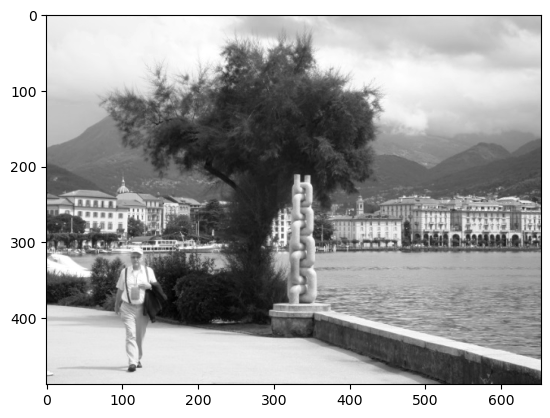

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

imgplot = plt.imshow(img, cmap='gray')

Постройте сингулярное разложение этой матрицы.

In [9]:
from numpy.linalg import svd

U, S, VT = svd(img, full_matrices=False)

NameError: name 'img' is not defined

**1. [0.1 балла]** Нарисуйте график диагональных элементов матрицы $\Sigma$:

array([<AxesSubplot:title={'center':'Singular values relative to their indexes'}, xlabel='number of the singular value', ylabel='Singular value'>,
       <AxesSubplot:xlabel='number of the singular value', ylabel='Log of singular value'>],
      dtype=object)

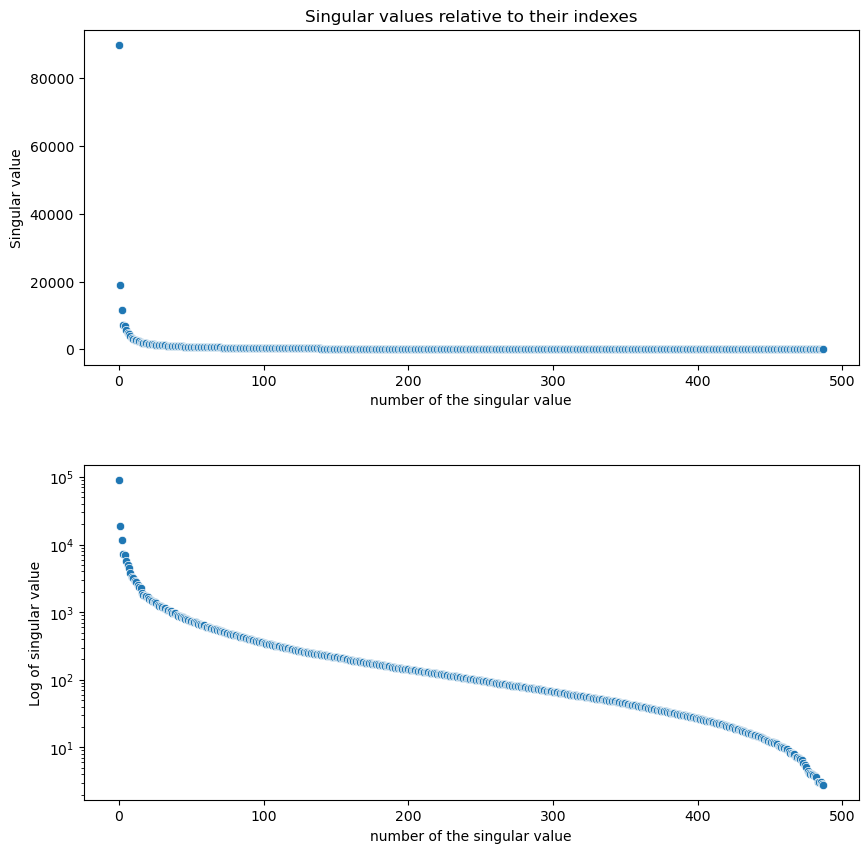

In [ ]:
import seaborn as sns

def plot_singular_values(rng=None):
    if rng is None:
        rng = S.shape[0]

    f, axes = plt.subplots(figsize=(10, 10), nrows=2)

    f.subplots_adjust(hspace=0.3)

    axes[1].set_yscale('log')

    axes[0].set_xlabel('number of the singular value')
    axes[1].set_xlabel('number of the singular value')

    axes[0].set_ylabel('Singular value')
    axes[1].set_ylabel('Log of singular value')

    axes[0].set_title('Singular values relative to their indexes')

    sns.scatterplot(data=S[:rng], ax=axes[0])
    sns.scatterplot(data=S[:rng], ax=axes[1])
    
    return axes

plot_singular_values()

Кажется, что они убывают достаточно быстро и есть надежда, что первые несколько компонент дадут картинку, близкую к исходной.

**Важно:** при визуализации различных компонент в этом задании используйте только матричные операции. В частности, избегайте циклов, функций `map` и `reduce`, а также специальных функций, находящих суммы компонент.

**2. [0.1 балла]** Визуализуйте первую компоненту ранга 1. Ожидали ли Вы увидеть именно это? Поясните.

In [ ]:
print(type(img), img.min(), img.max())

<class 'numpy.ndarray'> 15.0 255.0


In [ ]:
img[10:15, 10:15]

array([[237.66666667, 237.66666667, 237.66666667, 237.66666667,
        237.66666667],
       [236.66666667, 237.66666667, 237.66666667, 237.66666667,
        237.66666667],
       [236.66666667, 236.66666667, 236.66666667, 237.66666667,
        237.66666667],
       [236.66666667, 236.66666667, 236.66666667, 236.66666667,
        236.66666667],
       [236.66666667, 236.66666667, 236.66666667, 236.66666667,
        236.66666667]])

Мы работаем с изображением в оттенках серого, полученным при усреднении трех цветовых компонент, для хранения значений которых использовалось uint8 (то есть дискретизация на 256 значений). То есть получаемое нами матричное представление -- это в общем случае матрица со значениями в отрезке $[0; 255]$ действительных чисел.
Соответственно, сумма всех наших одноранговых компонент должна давать значение в этом диапазоне (но при этом сами компоненты необязательно в них лежат, и их элементы могут быть отрицательными или больше 255).

In [ ]:
np.atleast_2d(U[:,0]).shape, np.atleast_2d(VT[0, :].T).shape

((1, 488), (1, 653))

In [ ]:
first_rank_approx_no_sigma = np.atleast_2d(U[:,0]).T @ np.atleast_2d(VT[0, :])
first_rank_approx = np.atleast_2d(U[:,0]).T @ np.atleast_2d(VT[0,:]) * S[0]

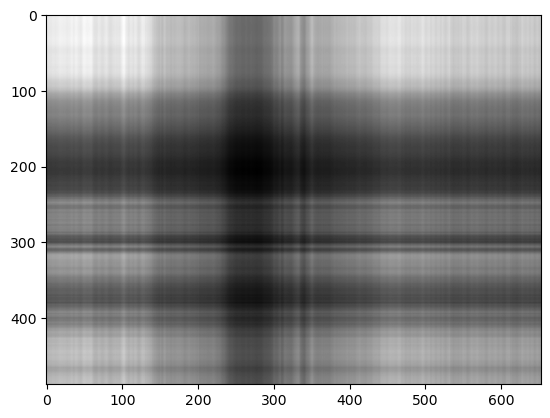

In [ ]:
plt.imshow(first_rank_approx_no_sigma, cmap='gray')

In [ ]:
(first_rank_approx_no_sigma.mean(), first_rank_approx_no_sigma.min(), first_rank_approx_no_sigma.max())

(0.0017005176158154114, 0.0006505964728862469, 0.002983819062861758)

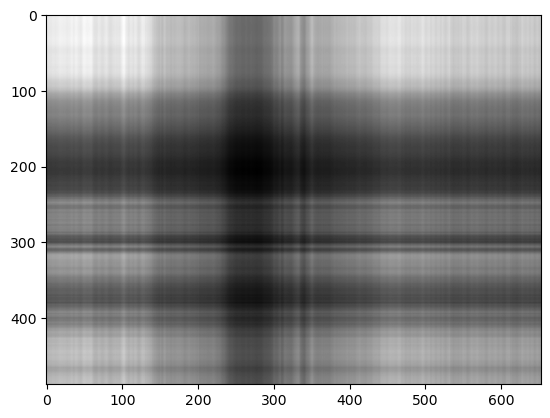

In [ ]:
plt.imshow(first_rank_approx, cmap='gray')

In [ ]:
(first_rank_approx.mean(), first_rank_approx.min(), first_rank_approx.max())

(152.7040681992802, 58.42263981381582, 267.9427166363524)

(заметим, что matplotlib назначил пикселям интенсивность серого после нормализации по диапазону значений, поэтому из-за умножения на скаляр картинка не изменилась)

Перемножив два вектора для того, чтобы получить матрицу, мы, разумеется, можем наблюдать на изображении "полосы", так каждая строка и столбец получались умножением скаляра (элемента одного вектора) на все элементы другого вектора, и мы получаем как бы массив их "растяжений" на вектор из скаляров. Причем интенсивность цветов достаточно хорошо совпадает с исходной картинкой, то есть мы получаем сравнительно маленькое расстояние от первого приближения до исходной матрицы по норме Фробениуса -- этого можно было ожидать из теоремы выше, по которой мы строим 1-ранговое приближение. Так что в целом картинка ожидаемая.

**3. [0.5 балла]** Визуализуйте суммы компонент ранга 1 с первой по двадцатую, с первой по пятидесятую, с двадцатой по сотую, с двадцатой по последнюю. Сделайте выводы.

Поскольку по механике умножения матриц рассматриваемого вида $A_{r} = \sigma_{1}u_1v_1^T + \sigma_{2}u_2v_2^T + \ldots + \sigma_{r}u_rv_r^T$ и при этом само r-приближение мы получаем из исходного полного сингулярного разложения заменой всех сингулярных значений номера выше r на нули, мы можем получить сумму на необходимом отрезке, просто заменив в копии вектора сингулярных значений нужные элементы и перемножив матрицы -- так мы сможем задействовать алгоритмы быстрого перемножения матриц, которые реализованы в numpy под капотом. Да, часть умножений при этом будет произведена впустую из-за нулевого блока в правом нижнем углу матрицы сингулярных значений, но это явно тоже как-то оптимизировано под капотом. 

In [ ]:
def from_to_1_rank_component_sum(U, S, VT, from_, to_):
    """Return sum of the 1-rank approximations of the matrix starting with layer from_ and up to layer to_. 
    from_ and to_ layers count starts at 1, both are included in the sum"""
    from_ -= 1
    S_r = S.copy()
    S_r[:from_] = 0
    S_r[to_:] = 0
    
    return U @ np.diag(S_r) @ VT


Можно заметить, как первые три слоя сами по себе грубо приближают крупные цветовые пятна картинки: дерево, небо, кусочки диагонального бордюра, а более старшие слои изолированно уже напоминают шум.

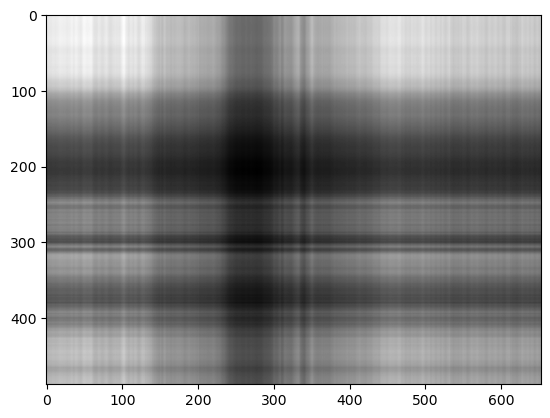

In [ ]:
sum_1_1 = from_to_1_rank_component_sum(U, S, VT, 1, 1)
plt.imshow(sum_1_1, cmap='gray')

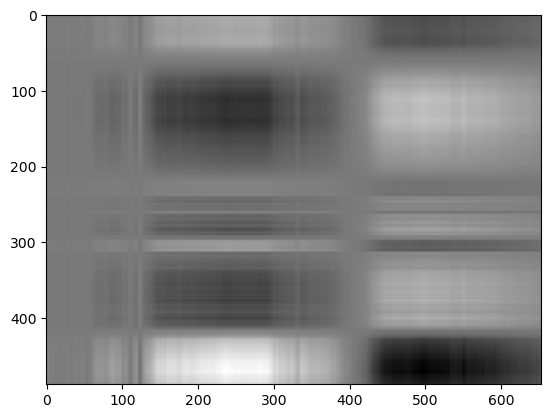

In [ ]:
plt.imshow(from_to_1_rank_component_sum(U, S, VT, 2, 2), cmap='gray')

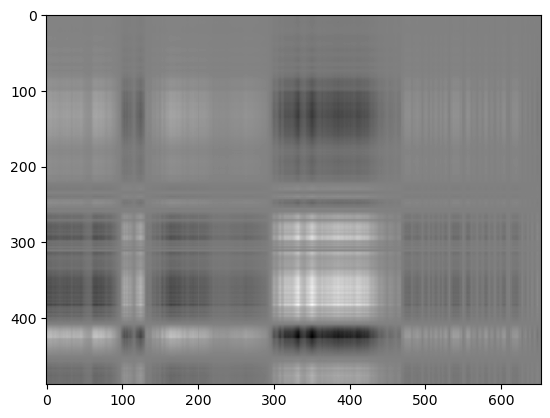

In [ ]:
sum_3_3 = from_to_1_rank_component_sum(U, S, VT, 3, 3)
plt.imshow(sum_3_3, cmap='gray')

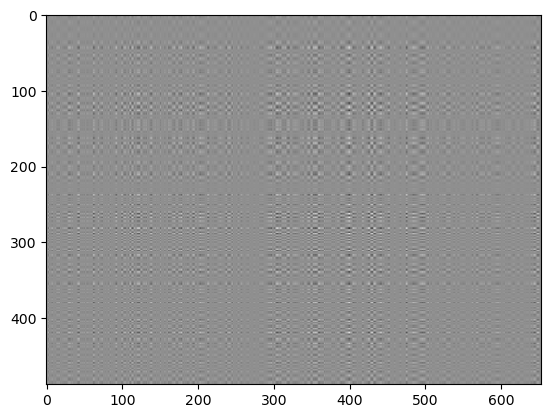

In [ ]:
sum_100_100 = from_to_1_rank_component_sum(U, S, VT, 100, 100)
plt.imshow(sum_100_100, cmap='gray')

При этом визуализация, опять же, нормализованная, а на самом деле в матрице находятся значения вне формального диапазона пикселей, и они уменьшаются по модулю при увеличении r, поскольку уменьшается сингулярное значение.

In [ ]:
(sum_1_1.mean(), sum_1_1.min(), sum_1_1.max())

(152.7040681992802, 58.42263981381583, 267.9427166363524)

In [ ]:
(sum_3_3.mean(), sum_3_3.min(), sum_3_3.max())

(0.02438521227085646, -132.4572192979942, 130.97907752702892)

In [ ]:
sum_20_20 = from_to_1_rank_component_sum(U, S, VT, 20, 20)
(sum_20_20.mean(), sum_20_20.min(), sum_20_20.max())

(-0.000421444673330187, -46.331324923548195, 47.94419007199327)

In [ ]:
sum_100_100 = from_to_1_rank_component_sum(U, S, VT, 100, 100)
(sum_100_100.mean(), sum_100_100.min(), sum_100_100.max())

(6.841422226600529e-07, -8.736629709090877, 6.873112865075826)

При суммировании первых k слоев мы получаем все более близкую к исходной картинку по мере увеличения k -- в точности потому, что благодаря росту ранга приближения мы получаем всё больше степеней свободы для минимизации разницы по норме Фробениуса, которая идеально описывает попиксельную разность изображений. В суммах поздних слоев без отрезка первых угадываются силуэты объектов на фотографии, поскольку поздние слои как раз "неформально" используются для коррекции границ объектов, четкости которых нельзя было достигнуть при более низкоранговых приближениях. При этом падающее на каждом слое сингулярное значение как раз позволяет дифференцировать значимость прибавки к пикселям на между слоями, а значения столбцов матриц -- внутри одного слоя.

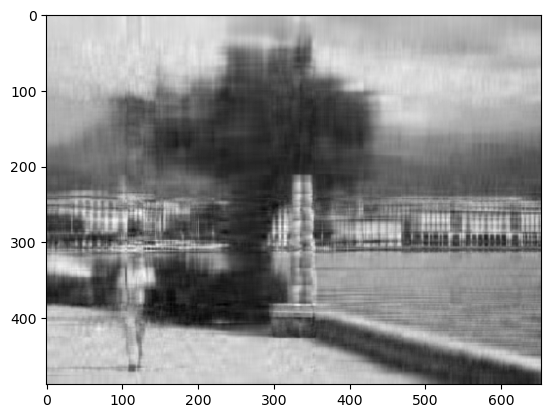

In [ ]:
plt.imshow(from_to_1_rank_component_sum(U, S, VT, 1, 20), cmap='gray')

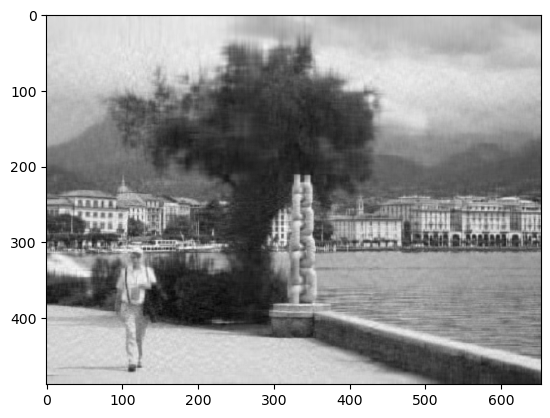

In [ ]:
plt.imshow(from_to_1_rank_component_sum(U, S, VT, 1, 50), cmap='gray')

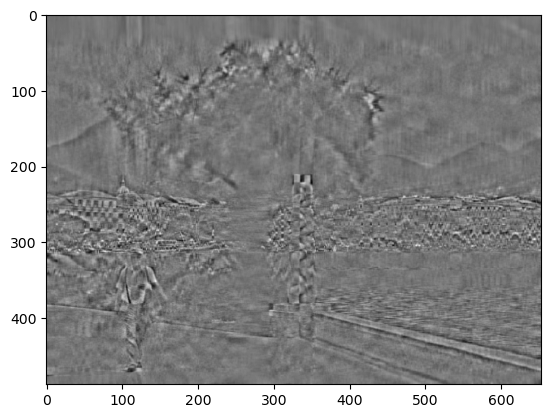

In [ ]:
plt.imshow(from_to_1_rank_component_sum(U, S, VT, 20, 100), cmap='gray')

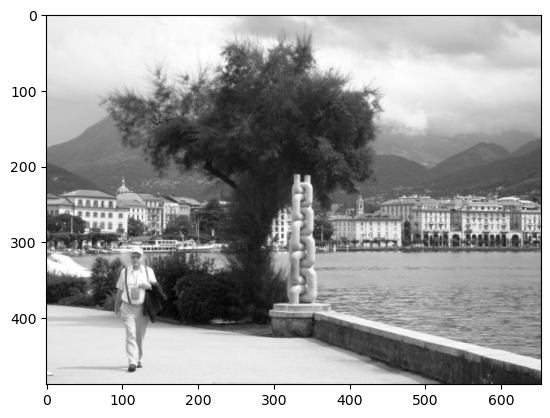

In [ ]:
plt.imshow(from_to_1_rank_component_sum(U, S, VT, 1, S.shape[0]), cmap='gray')

**4. [0.35 балла]** Как Вам кажется, какие компоненты нужно взять для достаточно хорошего восстановления исходного изображения? Аргументируйте свой ответ. Не забудьте визуализировать сумму выбранных компонент.

*Комментарий: для получения полного балла за это задания постарайтесь привести более убедительный аргумент, нежели Ваши субъективные впечатления от сравнения полученного изображения с исходным.*

Раз уж мы заметили, что модули значений элементов слоев падают с увеличением номера слоя из-за падения сингулярных значений, снова посмотрим на их распределение. 

array([<AxesSubplot:title={'center':'Singular values relative to their indexes'}, xlabel='number of the singular value', ylabel='Singular value'>,
       <AxesSubplot:xlabel='number of the singular value', ylabel='Log of singular value'>],
      dtype=object)

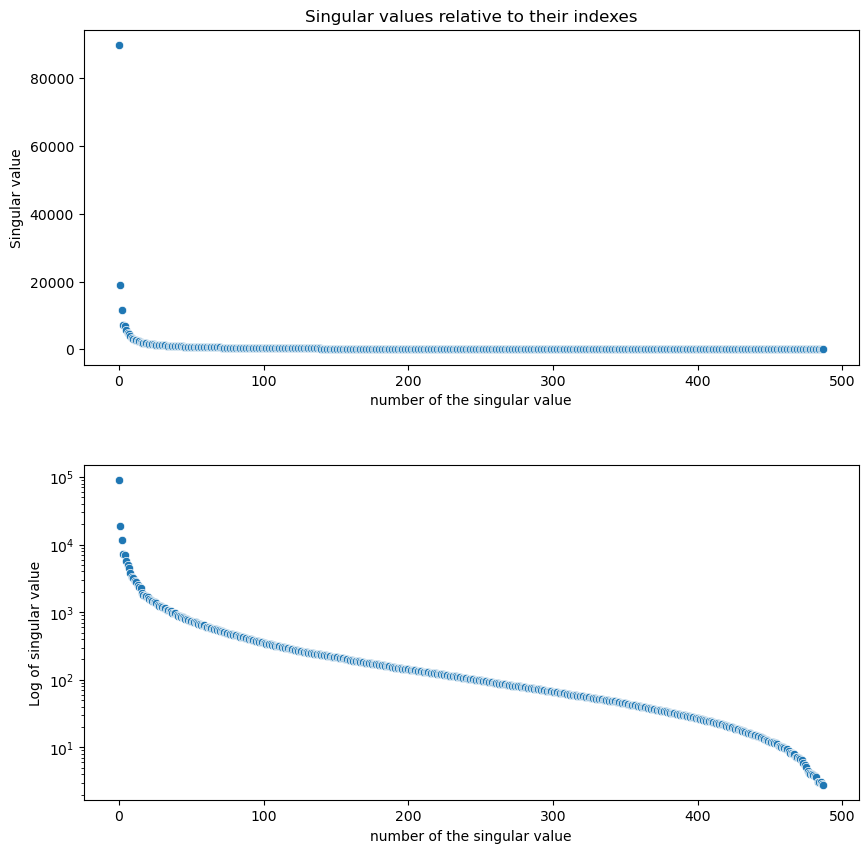

In [ ]:
plot_singular_values()

array([<AxesSubplot:title={'center':'Singular values relative to their indexes'}, xlabel='number of the singular value', ylabel='Singular value'>,
       <AxesSubplot:xlabel='number of the singular value', ylabel='Log of singular value'>],
      dtype=object)

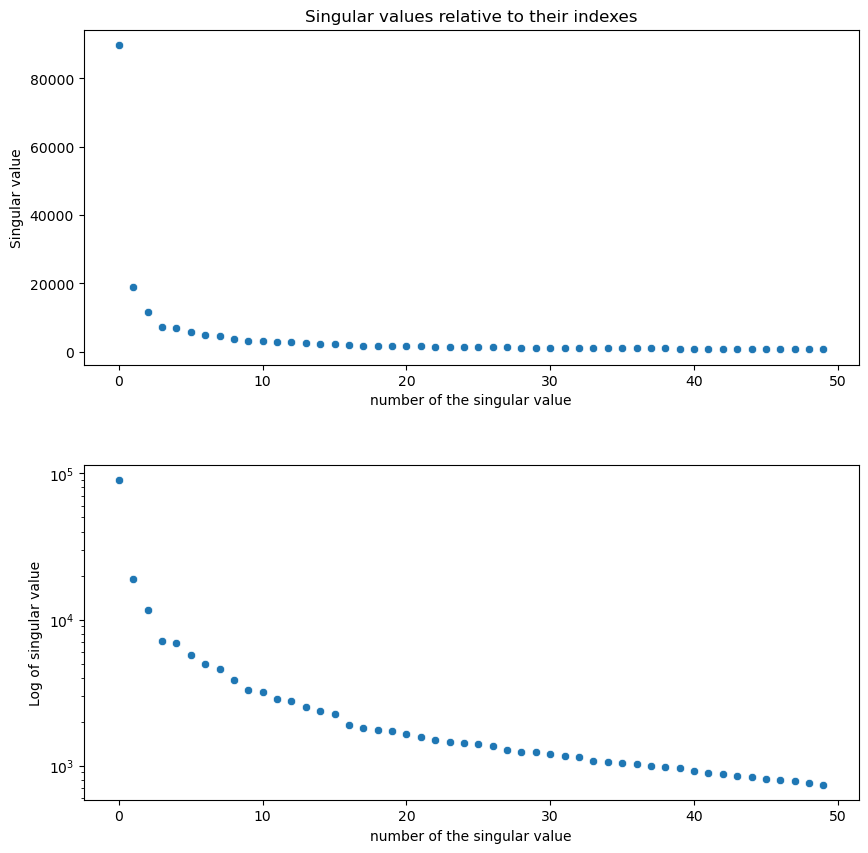

In [ ]:
plot_singular_values(50)

Заметим, что модуль сингулярного значения резко падает на первых 16 значениях, а все остальные значения оказываются вблизи нуля, и соответствующие им слои составляют достаточно малые корректирующие прибавки. Так что формально "достаточно хорошим" приближением (но скрепя сердце, потому что некрасиво) можно назвать $A_{16}$ -- на нем уже можно различить объекты на фотографии.

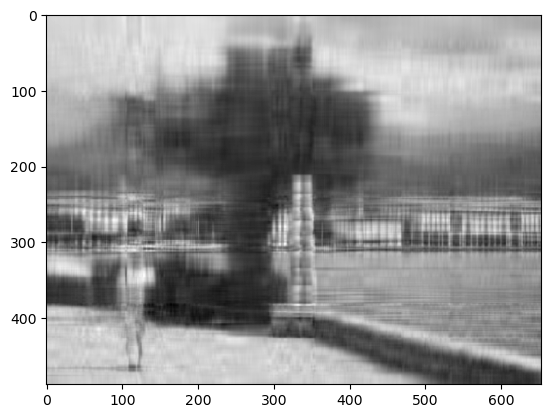

In [ ]:
plt.imshow(from_to_1_rank_component_sum(U, S, VT, 1, 16), cmap='gray')

**5. [0.15 балла]** Во сколько раз меньше памяти (теоретически) потребуется для хранения нового изображения по сравнению с исходным?

**6. [0.25 балла]** Подсчитайте, сколько в действительности места в памяти компьютера занимают исходная матрица и компоненты её сингулярного разложения. Согласуется ли этот результат с ответом предыдущего пункта? Сделайте выводы.

Пускай прошлое изображение было размера $M*N$ в пикселях, и каждый пиксель весил p байтов. Тогда исходный вес изображения в сыром виде равен $M*N*p$. 
Для хранения низкорангового приближения нам требуется отдельно хранить элементы усеченных U и V, а также элементы диагонали, и предположим, что для хранения элементов матриц используется тип данных размером t байтов, так как используемый для хранения пикселей тип данных может не вмещать наши значения. Тогда при хранении r-приближение будет занимать $(Mr + Nr + r)t = rt(M + N + 1)$.

В нашем случае r=16, M=488, N=653 и мы получаем отношение $\frac{MNp}{rt(M + N + 1)} = \frac{488*653*p}{16t(488 + 653 + 1)} = \sim 17,44\frac{p}{t}$


При этом вероятно $\frac{p}{t}<1$, так как для хранения пикселей в интенсивности серого обычно используют uint8 весом в 1 байт, а для хранения разложения без дополнительной (значительной) потери точности придется использовать хотя бы float, который весит 4 байта, и тогда мы получаем уменьшение уже не в 17.4 раз, а только в ~4.35, а еще сверху получим вычислительную нагрузку, потому что тогда для работы с изображением нам его нужно не только считать, но и вычислить из компонент.

In [ ]:
src_size = img.shape[0]*img.shape[1]
svd_size = U[:, 0:16].nbytes+S[0:16].nbytes+VT[0:16, :].nbytes
print(f"Исходное изображение должно весить {src_size} байтов")
print(f"На покомпонентное хранение требуется {svd_size} байтов")
print(f"Итоговое отношение: {src_size/svd_size}")

print(f"Используемый в разложении тип данных:{U.dtype}")

Исходное изображение должно весить 318664 байтов
На покомпонентное хранение требуется 146176 байтов
Итоговое отношение: 2.1800021891418564
Используемый в разложении тип данных:float64


Мы получили выигрыш даже меньше, потому что разложение хранится в RAM в восьмибайтовом float64. 

### Задание 2. Геометрия SVD. Визуализация данных с помощью SVD

**Геометрический смысл SVD**

Допустим, что у нас есть выборка $x_1,\ldots,x_m\in\mathbb{R}^n$. Запишем её в матрицу объекты-признаки

$$X = \begin{pmatrix}
x_{11} & \ldots & x_{1n}\\
\vdots & & \vdots\\
x_{m1} & \ldots & x_{mn}
\end{pmatrix}$$

(строки — объекты, столбцы — признаки) и сделаем SVD-разложение: $X = U\Sigma V^T$. Его можно интерпретировать следующим образом:

$$X = U\Sigma\cdot V^T,$$

где $U\Sigma$ — это матрица объекты-признаки для тех же объектов, но в новых признаках, полученных из исходных с помощью линейного преобразования $V$ (напоминаем, что умножение на матрицу справа соответствует преобразованию столбцов). Попробуем понять, чем замечательны эти признаки.

Рассмотрим матрицу $X^TX = V\Sigma^2V^T$. Легко видеть, что это матрица Грама системы столбцов матрицы $X$; иными словами, в ней записаны скалярные произведения векторов различных признаков. Из лекций вы знаете, что $\sigma_1^2$, квадрат первого сингулярного числа, это наибольшее собственное значение матрицы $X^TX$, а $v_1$, первый столбец матрицы $V$, — это соответствующий собственный вектор. Можно показать, что

$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}\left(|Xw|\right).$$

Попробуем осознать физический смысл этой штуки. Напомним, что строки матрицы $X$ — это координаты объектов $x_1,\ldots,x_m$ в пространстве признаков. Произведение $Xw$ — это вектор из значений на тех же самых объектах некоторого нового признака, являющегося линейной комбинацией исходных с коэффициентами $w_1,\ldots,w_n$:

$$Xw = w_1\begin{pmatrix} x_{11}\\ \ldots \\ x_{m1}
\end{pmatrix} + w_2\begin{pmatrix} x_{12}\\ \ldots \\ x_{m2}
\end{pmatrix} + \ldots + w_n\begin{pmatrix} x_{1n}\\ \ldots \\ x_{mn}
\end{pmatrix}$$

Соответственно, $|Xw|^2$ — это квадрат длины вектора, составленного из значений нового признака.

Таким образом, первому сингулярному значению $\sigma_1$ отвечает такой признак, у которого сумма квадратов значений максимальна, то есть признак, принимающий, условно говоря, самые большие значения.

Резюмируя, мы можем сказать, что сингулярное разложение делает следующее:
- находит новый признак (новое направление) вдоль которого "дисперсия"$^1$ максимальна;
- в ортогональной ему плоскости находит признак, вдоль которого "дисперсия" максимальна;
- и так далее.

---
$^1$ настоящая выборочная дисперсия с точностью до числового множителя была бы равна $|Xw - \overline{Xw}|^2$, где $\overline{Xw} = \frac1m\sum_{i=1}^m(Xw)_i$ — среднее значения признака.

**1. [1.25 балла]** Пусть $\sigma_1$ — старшее сингулярное число матрицы $X$ размера $m \times n$. Покажите, что верна цепочка равенств
$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}~|Xw| = \mathrm{max}_{|u|=|v| = 1}~|u^T Xv|.$$

**Подсказки:**
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|}$ выразите вектор $w$ как $\alpha\cdot v$, где $|v|=1$, и рассмотрите описанное выражение
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{|w| = 1}~|Xw|$ представьте $w$ в виде линейной комбинации ортонормированного базиса, состоящего из собственных векторов оператора $X^TX$, и внимательно посмотрите на произведение $wX^TXw$
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{|u|=|v| = 1}~|u^T Xv|$ разложите матрицу $X$ в SVD-разложение, а векторы $u$ и $w$ представьте в виде линейной комбинации векторов, являющихся столбцами матриц $U$ и $V$.

Определим $\varphi$ как самосопряженный линейный оператор с матрицей $X^TX$. Его матрица симметрична, значит, диагонализуема, значит, существует ортонормированный базис из собственных векторов оператора, обозначим его как $(e_1, \dotso, e_n)$.

Разложим по нему $w = \sum_i^n \beta_ie_i$, поскольку $w \in <e_1, \dotso, e_k>; \: |w|^2 = \sum_i^n \beta_i^2$.

Поскольку $\varphi$ самосопряжен, $X^TX$ в это базисе -- диагональная матрица квадратов сингулярных значений, тогда

$X^TXw = 
\sum_i^n \sigma^2_i\beta_ie_i$

Из этого можем вывести квадрат нужной формулы длины:

$|Xw|^2 = (Xw, Xw) = w^TX^TXw = \sum_i^n \sigma^2_i\beta_i$\\


Поскольку $\sigma_1 \geq \sigma_i > 0 \: \forall i > 1$, $\sigma^2_i|w|^2 \geq |Xw|^2 \iff \sigma_i|w| \geq |Xw| \iff \sigma_1 \geq \frac{|Xw|}{|w|}$

Тогда, если w -- вектор с собственным значением $\sigma_1$, то мы получаем равенство! И тогда $\sigma_1 = \max_w \frac{|Xw|}{|w|} = \max_{|w|=1} |Xw|$.

А теперь добьем четвертое, снова посмотрев на квадрат длины (как удобно-то):
$|u^TXv|^2 = (u^TXv, u^TXv) = (u^TXv)^T(u^TXv) = v^TX^Tuu^TXv = v^TX^TXv = (Xv, Xv) = |Xv|^2$

Тогда $\max_{|w|=1} |Xw| = \max_{|u|=|v|=1} |u^TXv|$ -- получили четвертое равенство в цепочке.

**2. [0.75 балла]** Рассмотрим матрицу $A = (a_{ij})$ размера $n \times n$, такую что $a_{ij} = \sin i \cdot \cos j$, причём нумерация ведётся с нуля. Найдите $r = \text{rk}A$ (можете считать, что $n > 1$), а также разложение (Compact SVD) $A=U \Sigma V^T$, где $U$ и $V$ — матрицы с ортонормированными столбцами размера $n\times r$, а $\Sigma = \mathrm{diag}(\sigma_1,\ldots,\sigma_r)$ — диагональная матрица размера $r\times r$, в которой $\sigma_1\geqslant\ldots\geqslant\sigma_r > 0$.

Рассматривая строки матрицы, можно заметить, что из-за статичности косинуса в рамках столбца $a_{tj} = a_{sj}\frac{\sin(t)}{\sin(m)}$, где t и s -- номера строк, а $ t \in \mathbb{N} \implies \sin(t) \neq 0$. И в таком случае мы получаем, что всякие две строки ялвяются линейно зависимыми, и ранг такой матрицы равен в точности единице: $rk A = 1$.

Ранг матрицы сингулярных значений равен рангу матрицы оператора, поэтому в SVD $rk A = rk \Sigma = 1$, тогда это просто скаляр, а матрицы U и V -- просто векторы, $U, V \in \text{Mat}_{n \times 1}$, $V^T \in \text{Mat}_{1 \times n}$


Очевидно по постановке задачи, что $A = W*S^T =
\begin{pmatrix}
\sin(0) \\ \sin(1) \\ \dotso \\ \sin(n-1)
\end{pmatrix}
\begin{pmatrix}
\cos(0) & \cos(1) & \dotso & \cos(n-1)
\end{pmatrix}$, тогда осталось просто найти скаляр, на который мы поделим векторы, чтобы получить разложение, и это можно сделать банально через длины векторов.

$|W| = \sqrt{\sigma_0^{n-1} \sin(i)^2}$
$|S| = \sqrt{\sigma_0^{n-1} \cos(i)^2}$

Положим $U = \frac{W}{|W|}$, $V = \frac{S}{|S|}$. Тогда $A = W*S^T = 
\frac{W}{|W|}*|W|*|S|*\frac{S^T}{|S|} = U*|W||S|*V^T = U*\sigma_1*V^T$


$$A = \frac{W}{|W|}*|W|*|S|*\frac{S^T}{|S|}$$

где $W = \begin{pmatrix}
\sin(0) \\ \sin(1) \\ \dotso \\ \sin(n-1)
\end{pmatrix}, \:
S^T =
\begin{pmatrix}
\cos(0) & \cos(1) & \dotso & \cos(n-1)
\end{pmatrix}$


**3. [0.5 балла]** Рассмотрим полное сингулярное разложение $A = U \Sigma V^T$ для матрицы размера $m \times n$, такой что $\text{rk}A=r$. Определим также линейное отображение $\mathcal{A} \colon \mathbb{R}^n \to \mathbb{R}^m$, которое действует умножением на матрицу $A$. Покажите, что $\text{Im}\mathcal{A} = \langle u_1, \ldots, u_r \rangle$, а $\text{Ker}\mathcal{A} = \langle v_{r+1}, \ldots, v_n \rangle$.

Поскольку $\Sigma$ диагональна и по рангу равна А, первые r диагональных элементов будут ее сингулярными значениями, а остальных r+1..n элементов -- нулями.

Кроме того, заметим, что поскольку V -- ортогональная матрица, $V^TV = E \implies AV = U\Sigma V^TV = U\Sigma = (u_1\sigma_1, \dotso, u_r\sigma_r, 0, \dotso, 0)$, то есть столбцы r+1..n AV нулевые -- но фактически, мы просто подействовали на векторы в столбцах V (которые формируют ортонормированный базис) нашим линейным оператором. Тогда очевидно, что столбцы r+1..n в V составляют базис ядра линейного оператора. QED-1.

В таком случае, образы столбцов 1..r V составляют базис образа. Тогда он представлен как $<AV^{(i)} \: \forall i=1..n>$. Заметим также, что $U^{(i)} = \frac{AV^{(i)}}{const}$, то есть столбцы U равны столбцам V, умноженным на некоторые ненулевые скаляры, то есть являются в подпространстве линейно независимой системой векторов той же размерности, то есть образуют базис. QED-2.

**4. [0.75 балла]** Рассмотрим матрицу $A$ размера $m \times n$, такую что $m \geqslant n$ и столбцы $A$ линейно независимы. Найдите матрицу $\Sigma$ из полного сингулярного разложения для матрицы $P = A(A^T A)^{-1} A^T$.

Мне неудобно техать несчастные сигмы, поэтому обозначим разложение $A = USV^T$.

Начинаем алгебраическое упражнение.

$A(A^TA^{-1})A^T = 
(USV^T)((USV^T)^T(USV^T))^{(-1)}(USV^T)^T = 
(USV^T)((VS^TU^T)(USV^T))^{(-1)})VS^TU^T = (*)
$

Вспомним, что U и V ортогональные, $U^T = U^{(-1)}$, $V^T = V^{(-1)}$

$
(*) =
(USV^T)((V^TS^TSV))^{(-1)})VSU^T =
USV^T(V^T)^{(-1)}(S^TS)^{(-1)}V^TVS^TU^T =
US(S^TS)^{(-1)}S^TU^T
$
 
U по краям похожи на необходимые в SVD ортогональные матрицы перехода, посмотрим на интересную часть в центре:

$S(S^TS)^{(-1)}S^T$. Вспомним, что S -- диагональная матрица сингулярных значений А, но тогда $S^TS$ будет диагональной матрицей их квадратов, а обратная к ней -- диагональная матрица обратных их квадратов. Но мы фактически умножаем на них же, умножая слева на S и справа на $S^T$, и тогда мы получаем диагональную квадратную матрицу размера $m \times m$, где первые n диагональных элементов равны 1, а остальные нулевые. Красиво.

$P = 
U \Sigma U^T$


$\Sigma = \text{diag}(1_1, \dotso, 1_n, 0_{n+1}, \dotso, 0_m)$

**Визуализация данных с помощью SVD**

Выше мы обсудили, что первые из "новых" признаков — это признаки, значения которых, скажем так, наиболее разнообразны. Зачастую (хотя и не всегда) именно они несут в себе наиболее важные черты датасета. И если взять два-три первых, то датасет можно нарисовать и посмотреть на него — и, возможно, обнаружить какую-то структуру.

С помощью функции `dsklearn.datasets.load_digits()` загрузите датасет рукописных цифр [MNIST](http://yann.lecun.com/exdb/mnist/). В нём есть несколько атрибутов; вам сейчас будут нужны `digits.data` (`np.array`, строки которого — это вытянутые в одну строку значения пикселей) и `digits.target` (в них записаны соответствующие цифры).

0


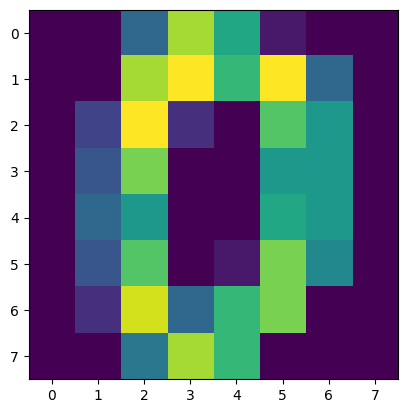

In [6]:
import matplotlib.pyplot as plt
from sklearn import datasets

digits = datasets.load_digits()

print(digits.target[0])

plt.imshow(digits.data[0].reshape((8,8)))

**5. [0.1 балла]** Примените к матрице `digits.data` сингулярное разложение.

In [7]:
U1, S1, VT1 = svd(digits.data, full_matrices=False)

NameError: name 'svd' is not defined

**6. [0.65 балла]** Визуализируйте данные, спроецировав их на такую плоскость, чтобы координаты точек соответствовали первым двум новым признакам. Не забудьте покрасить точки, отвечающие различным цифрам, в разные цвета (если Вы любите красивые визуализации, разберитесь, как вместо точек рисовать маленькие цифры).

Такой проекцией являются первые два столбца матрицы $U\Sigma$.

In [ ]:
def plot_2feature_projection(decomp, dataset):
    
#     plt.figure(figsize = (10,10))
    
    colors = np.array(['b','g', 'r', 'c', 'm', 'y', 'k', 
                       'violet','pink','orange'])
    
    f, ax = plt.subplots()
    
    ax.set_figsize = (10, 10)
    ax.set_title('Objects in re-features 1, 2')
    ax.set_xlabel('re-feature 1')
    ax.set_ylabel('re-feature 2')
    
    for a,b,c in zip(decomp[:, 0], decomp[:,1], range(dataset.data.shape[0])):
        a = np.array(a)
        b = np.array(b)
        ax.scatter(a, b , color = colors[digits.target[c]])

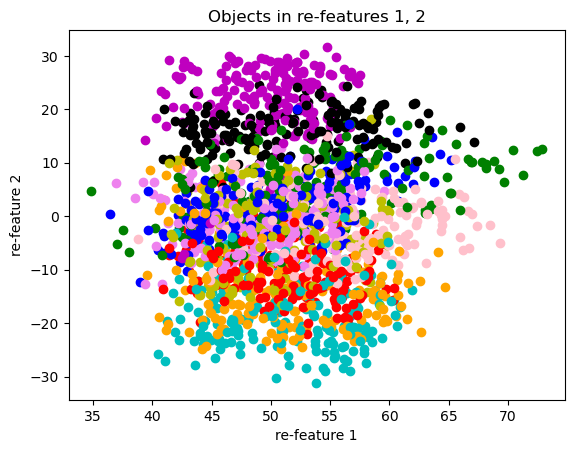

In [ ]:
plot_2feature_projection(U1 @ np.diag(S1), digits)

**7. [0.25 балла]** Теперь вычтите из каждого признака его среднее значение, снова сделайте SVD и нарисуйте разноцветные точки.

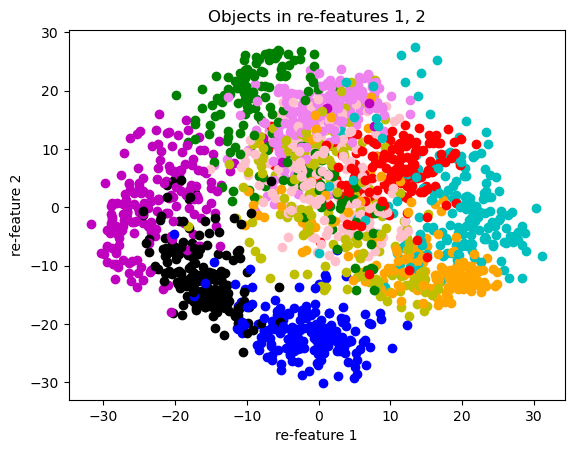

In [ ]:
U2, S2, VT2 = svd(digits.data - digits.data.mean(axis = 0), full_matrices=False)
features = U2 @ np.diag(S2)

plot_2feature_projection(features, digits)

**8. [0.25 балла]** Сравните выполненные Вами в двух предыдущих пунктах визуализации. Чем последняя выгодно отличается от первой?

Во втором случае более явно видны кластеры объектов, принадлежных одному классу, то есть в этой проекции диперсия расстояния (евклидово в $\mathbb{R}^2$) между объектами одного класса меньше.

**9. [1 балл]** Сравните работу SVD с другим методом понижения размерности: [случайными гауссовскими проекциями](http://scikit-learn.org/stable/modules/generated/sklearn.random_projection.GaussianRandomProjection.html).

*Комментарий: Эксперименты без выводов, объясняющих полученные результаты, не оцениваются. Для получения полного балла за этот пункт постарайтесь провести как можно больше разноплановых экспериментов.*

Окей, попробуем нарисовать ГРП внаглую и взять первые две компоненты. Разумеется, ГРП говорит, что он так не играет, и мы получаем месиво без каких либо хороших кластеров, как и в случае с SVD. 

In [4]:
from sklearn.random_projection import GaussianRandomProjection as GRP

projector = GRP(digits.data.shape[1])

NameError: name 'digits' is not defined

In [1]:
plot_2feature_projection(projector.fit_transform(digits.data), digits)

NameError: name 'plot_2feature_projection' is not defined

Из тех же соображений, что и для SVD, попробуем вычесть среднее, но здесь это уже не работает совсем никак.

Почему? Потому что мы пытаемся извлечь семантику из массива пикселей. В случае с SVD мы говорим о том, что для каждой цифры-класса конкретные пиксели заполнены гораздо чаще, и поэтому описывающая их лучше всего линейная комбинация признаков как раз использует интенсивность цвета пикселей, и нас интересуют симметричные отклонения от среднего.

ГРП работает через умножение переданного датасета размера $n \times m$ на случайную матрицу размера $n\_components \times n$ слева -- буквально проецируя датасет в меньшую размерность при помощи случайных линейных комбинаций, при этом гарантируя сравнимо малые изменения расстояний между объектами в новом пространстве в сравнении со старым при помощи ограничений на матрицу своего линейного оператора. Вычитание среднего из каждой координаты не изменяет расстояние между ними, поэтому никак не улучшает ситуацию.

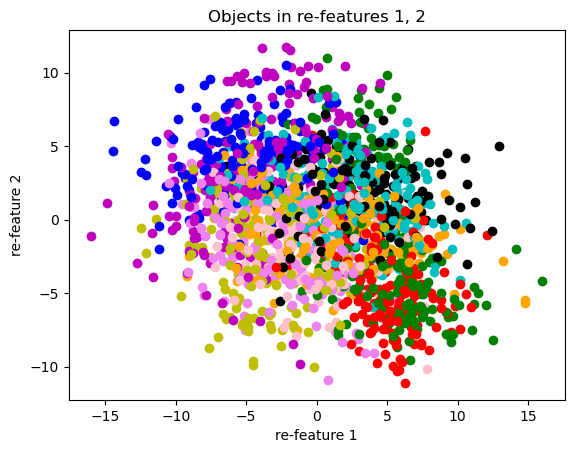

In [174]:
plot_2feature_projection(projector.fit_transform(digits.data - digits.data.mean(axis=0)), digits)

Остается покрутить параметры преобразования. Попробуем принудительно уменьшить допустимую размерность итогового пространства и число степеней свободы эмбеддинга, установив n_components=2. Проблема в том, что это никак не улучшает ситуацию, поскольку фичи в ГРП не ранжируются по влиянию на качество эмбеддинга, они, блин, случайные.

In [1]:
plot_2feature_projection(projector2.fit_transform(digits.data), digits)

NameError: name 'plot_2feature_projection' is not defined

Итого: ГРП слабо подходит для уменьшения размерности в нашей задаче, потому что не учитывает характер данных -- в каждом классе нам полезны интенсивности цветов отдельных пикселей, для нас нет никакой ценности в том, что мы случайно их отбрасываем.

### Задание 3. Когда SVD не сработает

**Disclaimer**

Цель этого задания — познакомить Вас не только с геометрическим смыслом сингулярного разложения, но и перекинуть очередной мостик между линейной алгеброй и анализом данных. К сожалению, на том берегу Вас встретят разные пока неизведанные понятия; мы постараемся по возможности дать какие-то определения, но, конечно, нет никакой возможности изложить на этих страницах полный курс теории вероятностей. Поэтому какие-то вещи останутся недосказанными или необоснованными; если Вам будет интересно, не стесняйтесь читать соответствующую литературу или хотя бы Википедию, а если нет, то мы надеемся, что хотя бы наглядное представление у Вас сформируется. В любом случае, нам хотелось бы, чтобы воспоминания об этом всколыхнулись в ваших головах, когда Вы будете это всё изучать в курсе по теории вероятностей.

Но начнём мы с того, что обсудим ситуацию, в которой SVD работает лучше всего: а именно, со случая, когда данные распределены нормально.

**Что такое плотность вероятности**

В дальнейшем Вам достаточно часто придётся сталкиваться со *случайными величинами*. Мы не будем сейчас пытаться строго определить, что это такое (для этого у вас будет целый курс по теории вероятностей), а остановимся только на одном его аспекте.

Если случайная величина $X$ принимает лишь конечное (или счётное) число значений $x_1,x_2,\ldots$, то чтобы задать её, достаточно описать, с какой вероятностью $X$ равна $x_i$:

$$p_i = P(X = x_i)$$

таким образом, чтобы $\sum_ip_i = 1$. Если же $X$ принимает значения на каком-либо отрезке или на всей числовой прямой, то так уже не получится: в этом случае вероятность того, что $X$ равна какому-то конкретному $x_0$, обычно равна нулю. Как правило, заменой вероятностей $p_i$ служит *функция плотности распределения* $p(x)$. Смысл её таков:

$$P(\alpha\leqslant X\leqslant\beta) = \int\limits_{\alpha}^{\beta}p(x)dx$$

(в левой части стоит вероятность того, что значение $X$ лежит на отрезке $[\alpha,\beta]$).

Таким образом, функция $p(x)$ действительно играет роль "плотности": вероятность попасть в отрезок одной и той же длины тем выше, чем больше значения $p(x)$ на нём.

**Нормальное распределение**

Одним из самых важных примеров непрерывных распределений является *нормальное распределение*. Его плотность имеет вид

$$p(x) = \frac1{\sqrt{2\pi\sigma^2}}e^{-\frac{(x - a)^2}{2\sigma^2}}$$

У него есть два параметра:

- $a$ - *математическое ожидание*, имеющее смысл среднего значения и для нормального распределения совпадающее с центром симметрии распределения;
- $\sigma^2$ - *дисперсия*: чем она меньше, тем в большей степени распределение сконцентрировано подле своего математического ожидания

Нормальное распределение с параметрами $a$ и $\sigma^2$ можно кратко обозначать $\mathcal{N}(a, \sigma^2)$.

Чтобы проиллюстрировать это, мы сгененерируем много точек из распределений $\mathcal{N}(2, 0.25)$, $\mathcal{N}(0, 1)$ и $\mathcal{N}(0, 4)$ и по ним в каждом из этих случаев построим аппроксимацию функции плотности распределения. Обратите внимание, что параметр $a$ в `numpy` называется `loc`, $\sigma$ (без квадрата!) — `scale`

In [57]:
import numpy as np
from scipy.interpolate import UnivariateSpline
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

/tmp/ipykernel_22800/503124060.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s, hist=False, kde=True,
/tmp/ipykernel_22800/503124060.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s, hist=False, kde=True,
/tmp/ipykernel_22800/503124060.py:14: UserWarning: 

`distplot

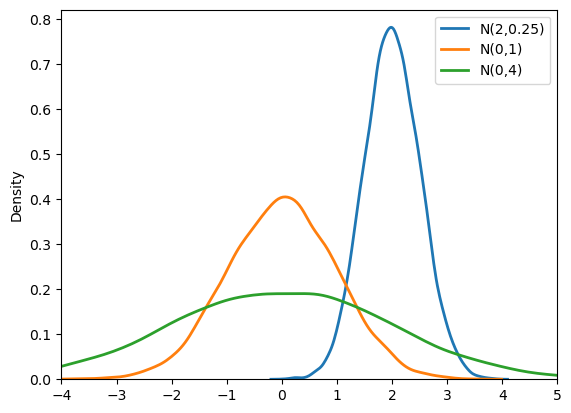

In [58]:
N = 10000
plt.xlim([-4,5])
s = np.random.normal(loc=2, scale=0.5, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True,
             bins=50,
             kde_kws={'linewidth': 2}, label='N(2,0.25)')

s = np.random.normal(loc=0, scale=1, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True,
             bins=50,
             kde_kws={'linewidth': 2}, label='N(0,1)')

s = np.random.normal(loc=0, scale=2, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True,
             bins=50,# color = 'darkblue',
             kde_kws={'linewidth': 2}, label='N(0,4)')

plt.legend()
plt.show()

**Функция плотности распределения в многомерном случае**

Если значения случайной величины $X$ — это многомерные векторы, функция плотности сохраняет примерно тот же смысл: если $\Omega\subseteq\mathbb{R}^n$, то

$$P(X\in\Omega) = \int\limits_{\Omega}p(x)dx$$

**Многомерное нормальное распределение**

Многомерное нормальное распределение определяется также двумя параметрами: *вектором средних* $a$ и положительно определённой *ковариационной матрицей* $\Sigma$; оно имеет плотность

$$p(x) = \frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)}$$

где, напомним, $x$ — вектор из $\mathbb{R}^n$. Компоненты вектора $a$ — это математические ожидания отдельных координат $X$, а на диагонали матрицы $\Sigma$ стоят их *дисперсии* (настоящие, без кавычек). Вне диагонали стоят *ковариации* компонент $X$ (пока вам достаточно понимать, что если они равны нулю, то эти компоненты независимы$^1$).

---
$^1$ Точнее сказать, некоррелированны, однако для компонент многомерного нормального распределения независимость и некоррелированность равносильны (на самом деле редкое и удачное свойство!).

**Несколько фактов**

* Под (n-1)-мерным эллипсоидом будем понимать гиперповерхность в $\mathbb{R}^n$, такую что в некоторой прямоугольной декартовой системе координат её уравнение принимает вид $\sum_{i=1}^n \frac{x_i^2}{r_i^2} = 1$. Поверхности уровня $p(x) = c$ — это эллипсоиды.

*  Пользуясь теоремой о приведении квадратичной формы к главным осям, можно показать, что функция плотности многомерного нормального распределения представляется в виде произведения одномерных нормальных плотностей при переходе в новую систему координат.
$$p(x)=\frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)}\:\underset{\text{новая система координат}}{\to}\: p(x)=p(x_1)\cdot ...\cdot p(x_n)$$

    В частности, это означает, что с помощью замены координат можно добиться того, чтобы отдельные компоненты были независимы (то есть матрица ковариации $\Sigma$ диагональна).

А мы тем временем продемонстрируем это на конкретном примере, сгенерировав много точек из двумерного нормального распределения с вектором средних $(-1,3)$ и ковариационной матрицей

$$\begin{pmatrix}
1 & \frac32\\
\frac32 & 5
\end{pmatrix}$$

и нарисовав приближённо линии уровня функции плотности.

<AxesSubplot:>

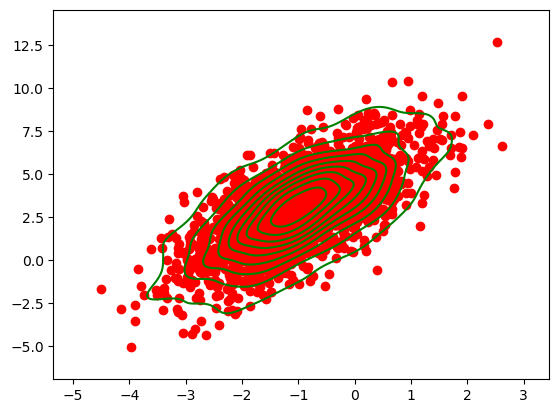

In [82]:
N = 2000
s = np.random.multivariate_normal(mean=np.array([-1,3]), cov=np.array([[1,1.5],[1.5,5]]), size=N)

f_ell, ax_ell = plt.subplots()

ax_ell.scatter(s[:,0], s[:,1], color='red')
sns.kdeplot(x=s[:,0], y=s[:,1], fill=False, color='g', ax=ax_ell)

Как видите, линии уровня весьма напоминают эллипсы (только напоминают, потому что точек у нас всё-таки конечное число).

**1. [0 баллов]** Сгенерируйте выборку из 1000 точек $x_1,\ldots,x_{1000}$ из нормального распределения с вектором средних $a = (0,0)$ и ковариационной матрицей

$$\Sigma = \begin{pmatrix}
1 & -2\\
-2 & 5
\end{pmatrix}.$$

In [100]:
sample = np.random.multivariate_normal(mean=np.array([0, 0]),
                                       cov=np.array([[1, -2],[-2, 5]]), 
                                       size=1000) 

**2. [0.25 балла]** Сделайте SVD-разложение $X = U\Sigma V^T$. Нарисуйте на плоскости все точки $x_i$ и направления новых признаков. Убедитесь, что направления новых признаков примерно совпадают с направлениями полуосей эллипса, образованного точками.

In [101]:
Us, Ss, VTs = svd(sample, full_matrices=False)

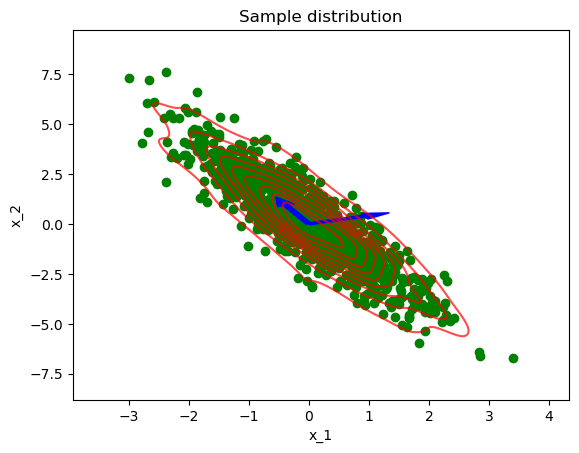

In [108]:
def plt_sample(sample, new_axes):
    f, ax = plt.subplots()
    
    ax.set_figsize = (10, 10)
    ax.set_title('Sample distribution')
    ax.set_xlabel('x_1')
    ax.set_ylabel('x_2')
    
    ax.scatter(sample[:,0], sample[:,1], color='green')
    sns.kdeplot(x=sample[:,0], y=sample[:,1], fill=False, color='red', alpha=0.7)
    ax.arrow(0, 0, new_axes[0, 0], new_axes[0, 1], width=0.1, color = 'b')
    ax.arrow(0, 0, new_axes[1, 0], new_axes[1, 1], width=0.1, color = 'b')

plt_sample(sample, VTs)

Буквально заметим, что да, совпадают.

**3. [0.5 балла]** Приведите к главным осям матрицу ковариации (это нужно сделать без привлечения `Python`) и убедитесь, что направления этих осей тоже примерно совпадают с наблюдаемыми направлениями полуосей эллипсоида.

Сначала найдем собственные значения стандартно по корням характеристического многочлена.

$\chi_A(t) = (-1)^2((1-t)(5-t)-(-2)(-2)) = 5 -t -5t + t^2 - 4 = (t - (2\sqrt(2) + 3))(t - (3 - 2\sqrt(2)))
$

$\text{Spec} = \{3+2\sqrt(2), 3 - 2\sqrt(2)\}$

Теперь собственные векторы по ядру линейного оператора.

$
A-t_1E = 
\begin{pmatrix}
-2-2\sqrt(2) & -2\\
-2 & 2-2\sqrt(2)
\end{pmatrix}
$

$v_1 = 
\begin{pmatrix}
1 - \sqrt(2) \\
1
\end{pmatrix}
$


$
A-t_2E = 
\begin{pmatrix}
2\sqrt(2)-2 & -2\\
-2 & 2\sqrt(2)+2
\end{pmatrix}
$

$v_2 = 
\begin{pmatrix}
1 + \sqrt(2) \\
1
\end{pmatrix}
$

In [111]:
VTs[0, :], VTs[1, :]

(array([-0.38004519,  0.92496792]), array([0.92496792, 0.38004519]))

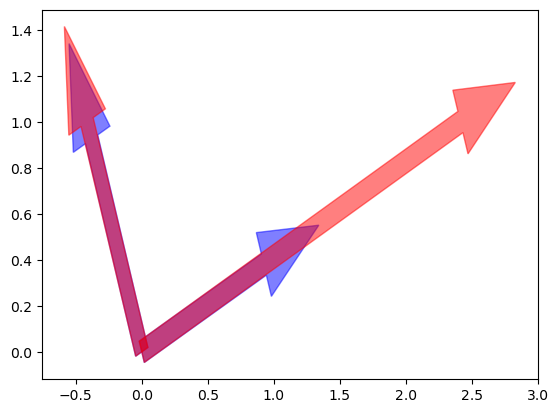

In [117]:
plot_data = [
    (VTs[0, :], 'b'),
    (VTs[1, :], 'b'),
    (np.array([1-2**0.5, 1]), 'r'),
    (np.array([1+2**0.5, 1]), 'r')   
]

f_t, ax_t = plt.subplots()

for k in plot_data:
    ax_t.arrow(0, 0, k[0][0], k[0][1], width=0.1, color=k[1], alpha=0.5)

Да, вполне буквально совпадают, просто нормированы.

Как Вы могли убедиться, SVD хорошо справляется со своей работой, когда данные распределены нормально, а в других случаях может давать совсем не такие информативные (или даже не адекватные) результаты.

**4. [0.25 балла]** Сгенерируйте двумерную выборку, представляющую собой два расположенных рядом (см. пример ниже) длинных и узких не пересекающихся эллипса с центрами в точках $(-1,0)$ и $(1,0)$ и с параллельными направлениями полуосей. Иными словами, постарайтесь как можно точнее воспроизвести картинку ниже.

Картинка отсутствует, но вроде понятно, что от нас хотят

In [138]:
N=1000
avg_1 = np.array([1, 0])
avg_2 = np.array([-1, 0])
cov_matr = np.array([[2, 3.5], [1, 1.5]])

E1 = np.random.multivariate_normal(mean=avg_1, cov=cov_matr, size=N) 
E2 = np.random.multivariate_normal(mean=avg_2, cov=cov_matr, size=N)

/tmp/ipykernel_22800/2324159247.py:6: RuntimeWarning: covariance is not positive-semidefinite.
  E1 = np.random.multivariate_normal(mean=avg_1, cov=cov_matr, size=N)
/tmp/ipykernel_22800/2324159247.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  E2 = np.random.multivariate_normal(mean=avg_2, cov=cov_matr, size=N)


**5. [0.1 балла]** Сделайте SVD и нарисуйте направления новых признаков.

In [143]:
U3, S3, VT3 = svd(np.concatenate([E1, E2], axis=0), full_matrices=False)

<AxesSubplot:>

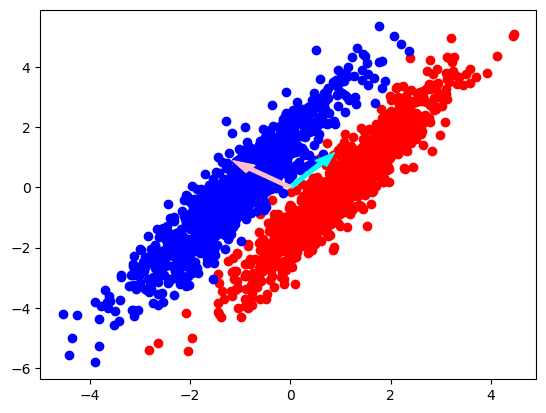

In [159]:
nonnormal_f, nonnormal_ax = plt.subplots()

nonnormal_ax.scatter(E1[:,0], E1[:,1], color='red')
nonnormal_ax.scatter(E2[:,0], E2[:,1], color='blue')
nonnormal_ax.arrow(0, 0, VT3[0, 0], VT3[0, 1], width=0.1, color='cyan')
nonnormal_ax.arrow(0, 0, VT3[1, 0], VT3[1, 1], width=0.1, color='pink')

nonnormal_ax

Если бы мы решали задачу анализа данных, то скорее всего нас интересовал признак, который бы разделял два кластера (в данном случае два эллипса), то есть такая функция $f(x)$, для которой
$$f(x) < c,\ \mbox{если объект $x$ из первого класса}$$
$$f(x) > c,\ \mbox{если объект $x$ из второго класса}$$
для некоторого числа $c$.

**6. [0.25 балла]** Помогает ли какой-нибудь из двух предоставленных SVD признаков обнаружить эту структуру? Обязательно поясните свой ответ.

Сам по себе первый признак (вектор цвета cyan) абсолютно бесполезен, так как по координате относительно него мы никак не можем определить вероятность принадлежности тому или иному классу.

А вот второй признак (вектор розового цвета) может быть достаточно полезен, потому что при помощи координаты относительно него мы можем разделить два класса (то есть существует такая перпендикулярная ему прямая, что почти наверное объекты в одной полуплоскости относительно нее лежат в одном классе).

При этом технически первый признак должен давать больший значимый импакт, но он как раз 'в неадеквате' из-за специфики распределения.

**7. [0 баллов]** Сгенерируйте выборку из 1000 точек $x_1,\ldots,x_{1000}$ из нормального распределения с вектором средних $a = (1,1)$ и ковариационной матрицей

$$\Sigma = \begin{pmatrix}
1 & 0\\
0 & 4
\end{pmatrix}.$$

In [160]:
N=1000
avg = np.array([1, 1])
cov_matr_3 = np.array([[1, 0], [0, 4]])

E3 = np.random.multivariate_normal(mean=avg, cov=cov_matr_3, size=N) 

**8. [0.2 балла]** Очевидно, что "интересными" для этого датасета направлениями будут направления полуосей эллипса-облака точек. Глядя только на матрицу $\Sigma$, определите, что это будут за направления? Поясните свой ответ.

Поскольку матрица диагональна, нам не нужно ее диагонализовывать и переходить в новый ортонормированный базис, поскольку наша функция плотности в $\mathbb{R}^2$ уже может быть представлена как произведение покоординатных функций плоскостей (см выше). Это значит, что оси эллипса параллельны осям стандартного базиса.

**9. [0.1 балла]** Сделайте SVD-разложение $X = U\Sigma V^T$. Нарисуйте все точки $x_i$ на плоскости и направления новых признаков.

In [161]:
U4, S4, VT4 = svd(E3, full_matrices=False)

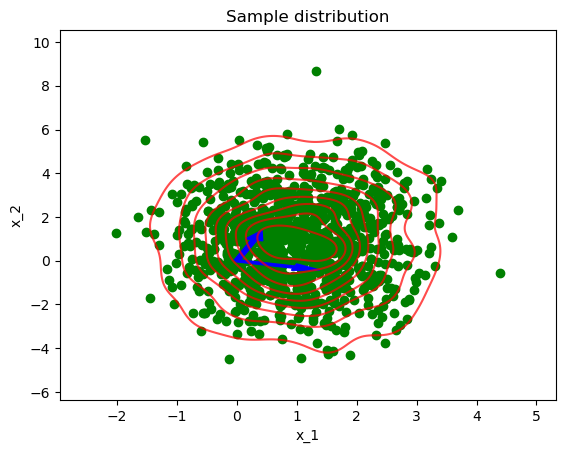

In [162]:
plt_sample(E3, VT4)

**10. [0.4 балла]** Сделайте вывод: в чём проблема и как можно её исправить?

Проблема в том, что наша функция плотности задана симметричной относительно точки (1; 1), а не стандартной нулевой, а это не учитывается в SVD. Именно для того, чтобы избавиться от этого эффекта смещения, мы отнимали выше из точек вектор покоординатных средних, чтобы сместить распределение в начало координат.

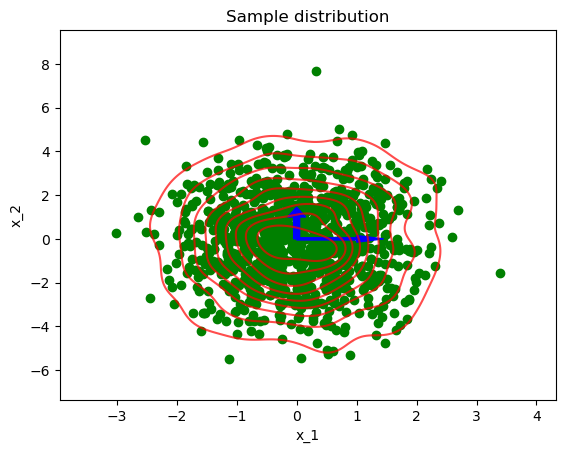

In [163]:
E4 = E3 - avg

U_final, S_final, VT_final = svd(E4, full_matrices=False)

plt_sample(E4, VT_final)

Никита прости за отвратительную цветовую гамму у меня не было сил подбирать палитру из сиборна. Держи мемов про Еву за свои страдания.

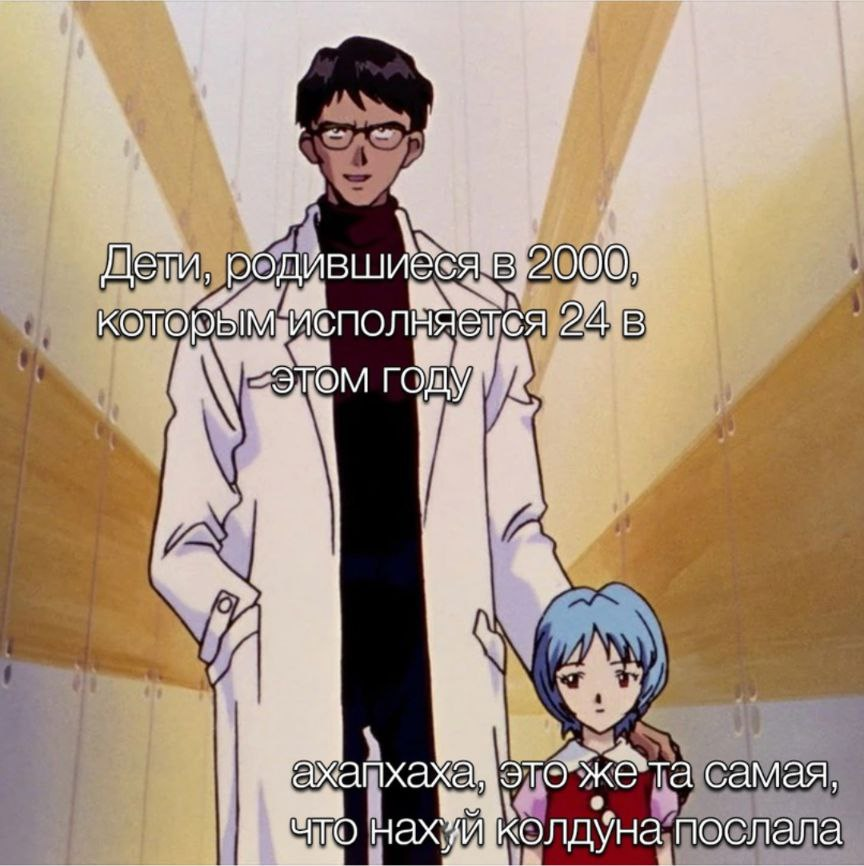

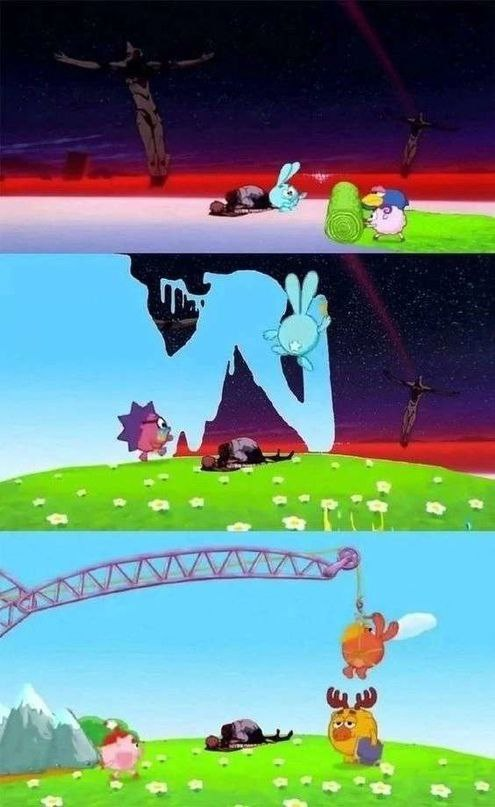